# **Combinatoire : notions préalables**
### Romain GERARD

Importer les packages.

In [1]:
from packcombi import *
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import pandas as pd
from IPython.display import display, Math, Latex
from sympy import symbols, expand, latex
import networkx as nx

## Factorielle et coefficient binomial

In [2]:
# Exemple: 7!
x = 7
display(Math(rf"{x}! = {facto_rec(x)}"))

# Exemple: C(10, 5)
n, k = 10, 2
display(Math(rf"\binom{{{n}}}{{{k}}} = {coeff_bino_rec(n, k)}"))

# Exemple dynamique : C(100, 20)
display(Math(rf"\binom{{{100}}}{{{20}}} = {coeff_bino_dyn(100, 20)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Permutations

In [3]:
# Exemple
n = 7
A = list(range(1, n+1))
sigma_n = permute_rec(A)

print("A =", A)
print()
print("Ensemble de toutes les n-permutations de A :")
print(sigma_n[0])
print(sigma_n[1])
print(sigma_n[2])
print(sigma_n[3])
print(". . .")
print(sigma_n[-2])
print(sigma_n[-1])

display(Math(rf"|\sigma_n| = {len(sigma_n)}"))
display(Math(rf"|A|! = {facto_rec(len(A))}"))


A = [1, 2, 3, 4, 5, 6, 7]

Ensemble de toutes les n-permutations de A :
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 7, 6]
[1, 2, 3, 4, 6, 5, 7]
[1, 2, 3, 4, 6, 7, 5]
. . .
[7, 6, 5, 4, 3, 1, 2]
[7, 6, 5, 4, 3, 2, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Nombre de Stirling de seconde espèce

In [4]:
display(Math(r"""
\textbf{Nombres de Stirling de seconde espèce} :
\\
\text{Définition récursive : }
S(n, k) = S(n-1, k-1) + k \, S(n-1, k),
\quad S(0, 0) = 1,
\quad S(x, 0) = S(0, y) = 0 \quad \text{pour tout } x>0, y>0.
"""))

# Exemple
n = 4
for k in range(5):
    display(Math(rf"S({n},{k}) = {calcule_stirling_rec(n,k)}"))

# Exemple dynamique
display(Math(rf"S({10},{5}) = {calcule_stirling_dyn(10, 5)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Table des nombres de Stirling de seconde espèce (n/k).
L = 10
table_stirling = np.zeros((L, L))
n, k = table_stirling.shape
table_stirling[0, 0] = 1
for i in range(1, n):
    for j in range(1, n):
        table_stirling[i, j] = table_stirling[i-1, j-1] + j*table_stirling[i-1, j]
print("Nombres de Stirling de seconde espèce (n/k):\n", table_stirling, sep="")

Nombres de Stirling de seconde espèce (n/k):
[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    3.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    7.    6.    1.    0.    0.    0.    0.    0.]
 [   0.    1.   15.   25.   10.    1.    0.    0.    0.    0.]
 [   0.    1.   31.   90.   65.   15.    1.    0.    0.    0.]
 [   0.    1.   63.  301.  350.  140.   21.    1.    0.    0.]
 [   0.    1.  127.  966. 1701. 1050.  266.   28.    1.    0.]
 [   0.    1.  255. 3025. 7770. 6951. 2646.  462.   36.    1.]]


## Nombre de Bell

In [6]:
display(Math(r"""
\textbf{Nombres de Bell} : B(n) = \sum_{k=1}^{n} S(n,k).
\\
\text{Définition récursive : }
B(n) = \sum_{m=0}^{n-1} \binom{n-1}{m} \, B(m), \quad B(0) = 1.
"""))

# Exemple : A000110
for num in range(0, 11):
    display(Math(rf"B({num}) = {calcule_bell_dyn(num)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Partitions de type A

In [7]:
# Exemple
A = list(range(1, 11))
k = 5
partitions = partitionne_stirling_dyn(A, k)
for p in partitions[:4]:
    print(p)
print("...")
for p in partitions[-4:]:
    print(p)

display(Math(rf"S({len(A)},{k}) = {len(partitions)}"))


[[1, 2, 3, 4, 5, 6], [7], [8], [9], [10]]
[[1, 2, 3, 4, 5, 7], [6], [8], [9], [10]]
[[1, 2, 3, 4, 5], [6, 7], [8], [9], [10]]
[[1, 2, 3, 4, 6, 7], [5], [8], [9], [10]]
...
[[1], [2, 10], [3], [4], [5, 6, 7, 8, 9]]
[[1], [2], [3, 10], [4], [5, 6, 7, 8, 9]]
[[1], [2], [3], [4, 10], [5, 6, 7, 8, 9]]
[[1], [2], [3], [4], [5, 6, 7, 8, 9, 10]]


<IPython.core.display.Math object>

In [8]:
# Exemple
A = list(range(0, 6))
all_partitions = partitionne_bell(A)
for p in all_partitions[:4]:
    print(p)
print("...")
for p in all_partitions[-4:]:
    print(p)
display(Math(rf"B({len(A)}) = {len(all_partitions)}"))
        

[[0, 1, 2, 3, 4, 5]]
[[0, 1, 2, 3, 4], [5]]
[[0, 1, 2, 3, 5], [4]]
[[0, 1, 2, 3], [4, 5]]
...
[[0], [1], [2, 5], [3], [4]]
[[0], [1], [2], [3, 5], [4]]
[[0], [1], [2], [3], [4, 5]]
[[0], [1], [2], [3], [4], [5]]


<IPython.core.display.Math object>

## Statistiques sur les permutations de type A

Descente, ascension, excédence et inversion.

In [9]:
# Exemple
n = 10
n_perm = [0, 1, 2, 3, 4, 5, 8, 7, 9, 6]

print(f"Permutation:\n{n_perm}")
print(f"Descentes :\n{liste_desc(n_perm)}")
print(f"Ascensions :\n{liste_asc(n_perm)}")
print(f"Excédence :\n{liste_exce(n_perm)}")
print(f"Inversions :\n{liste_inv(n_perm)}")



Permutation:
[0, 1, 2, 3, 4, 5, 8, 7, 9, 6]
Descentes :
[6, 8]
Ascensions :
[0, 1, 2, 3, 4, 5, 7]
Excédence :
[6, 8]
Inversions :
[(6, 7), (6, 9), (7, 9), (8, 9)]


Visualisation des distributions des statistiques.

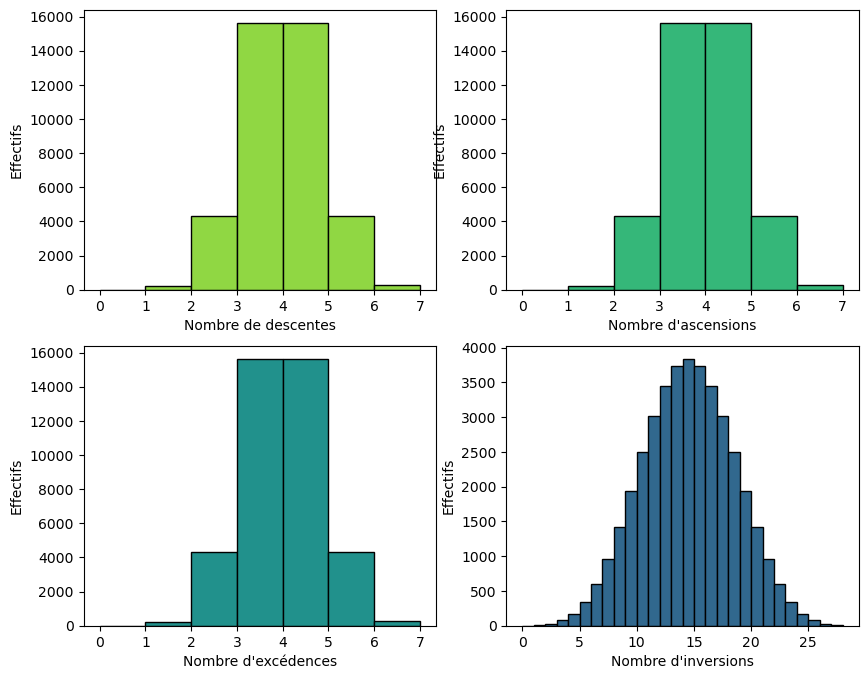

Analyse sur 40320 permutations de taille 8.


In [10]:
# Paramètres
n = 8
A = list(range(n))

# Générer les permutations
permutations = permute_rec(A)

# Calculer les statistiques
desc_counts = []
asc_counts  = []
exce_counts = []
inv_counts  = []

for perm in permutations:
    desc_counts.append(len(liste_desc(perm)))
    asc_counts.append(len(liste_asc(perm)))
    exce_counts.append(len(liste_exce(perm)))
    inv_counts.append(len(liste_inv(perm)))

# ------------
# Visualiser
# ------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Nombre de descentes
axes[0,0].hist(desc_counts, bins="auto", color="#90d743", edgecolor="black")
axes[0,0].set_xlabel("Nombre de descentes")
axes[0,0].set_ylabel("Effectifs")

# Nombre d"ascensions
axes[0,1].hist(asc_counts, bins="auto", color="#35b779", edgecolor="black")
axes[0,1].set_xlabel("Nombre d'ascensions")
axes[0,1].set_ylabel("Effectifs")

# Nombre d"excédences
axes[1,0].hist(exce_counts, bins="auto", color="#21918c", edgecolor="black")
axes[1,0].set_xlabel("Nombre d'excédences")
axes[1,0].set_ylabel("Effectifs")

# Nombre d"inversions
axes[1,1].hist(inv_counts, bins="auto", color="#31688e", edgecolor="black")
axes[1,1].set_xlabel("Nombre d'inversions")
axes[1,1].set_ylabel("Effectifs")

plt.show()

print(f"Analyse sur {len(permutations)} permutations de taille {n}.")

## Partitions de type B

### Générer des partitions de type B.

In [11]:
# Paramètres
n = 6
E = list(range(1, n+1))

# Générer toutes les partitions de type A.
parts_A = partitionne_bell(E)

# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)

# Afficher les résultats
print_partitions(parts_B, length=n, name="partitions de type B", scope=3)
print_partitions(parts_A, length=n, name="partitions de type A", scope=3)


[[-1, -2, -3, -4, -5, -6], [1, 2, 3, 4, 5, 6]]
[[-1, -2, -3, -4, -5, 6], [1, 2, 3, 4, 5, -6]]
[[-1, -2, -3, -4, 5, -6], [1, 2, 3, 4, -5, 6]]
...
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5, -6], [5, 6]]
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5, 6], [5, -6]]
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5], [5], [-6], [6]]
Nombre de partitions de type B pour n=6 : 1539
[[1, 2, 3, 4, 5, 6]]
[[1, 2, 3, 4, 5], [6]]
[[1, 2, 3, 4, 6], [5]]
...
[[1], [2], [3], [4, 6], [5]]
[[1], [2], [3], [4], [5, 6]]
[[1], [2], [3], [4], [5], [6]]
Nombre de partitions de type A pour n=6 : 203


Nombre de Dowling :

$$
D_n \;=\; \sum_{i=0}^n \binom{n}{i}
         \sum_{k=0}^{\,n-i} 2^{\,n-i-k}\,S(n-i,k).
$$

Le nombre de Dowling est une généralisation des nombres de Bell, qui compte les partitions de type B. Les nombres de Dowling sont définis pour n ≥ 0 et k ≥ 0. Ils sont calculés à l'aide de la formule ci-dessus.

In [12]:
# Exemple : A007405
for i in range(0, 10):
    display(Math(rf"D({i}) = {calcule_dowling(i)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Let $w_n$ denote the number of type B set partitions without zero block over $<n>$.
$$
w_n \;=\; \sum_{k=0}^n 2^{\,n-k}\,S(n,k).
$$

In [13]:
# Exemple : A004211
for i in range(0, 10):
    display(Math(rf"w_{i} = {calcule_dowling_no_zero_block(i)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Type B separated set partitions

In [14]:
# Paramètres
n = 5

# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)

# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)

# Filtrer les partitions de type B pour ne garder que celles qui sont séparées.
parts_B_separated_no_b0 = [part for part in parts_B if is_separated(part)]

# Filtrer les partitions de type B pour ne garder que celles qui sont fortement séparées.
parts_B_strong_separated_no_b0 = [part for part in parts_B if is_strongly_separated(part)]

# Afficher les résultats
print_partitions(parts_B_separated_no_b0, length=n, name="partitions de type B séparées sans b0", scope=3)
print(f"Nombre de partitions de type B fortement séparées sans b0 pour n={n} : {len(parts_B_strong_separated_no_b0)}")

n = n-1
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
parts_B = get_all_parts_B_from_A(parts_A)
print(f"Nombre de partitions de type B sans b0 pour n={n} : {len(parts_B)}")


[[1, -2, 3, -4, 5]]
[[1, -2, 3, -4], [5]]
[[1, -2, 3, 5], [4]]
...
[[1], [2], [3, -5], [4]]
[[1], [2], [3], [4, -5]]
[[1], [2], [3], [4], [5]]
Nombre de partitions de type B séparées sans b0 pour n=5 : 116
Nombre de partitions de type B fortement séparées sans b0 pour n=5 : 49
Nombre de partitions de type B sans b0 pour n=4 : 49


### Type B Merging-Free set partitions

Merge-free block.

In [15]:
# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1 ,n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Filtrer les partitions de type B pour ne garder que celles qui sont merge-free.
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
# Afficher les résultats
print_partitions(parts_B_merge_free, length=n, name="partitions de type B merge-free", scope=3)
print(f"Nombre de partitions de type B pour n={n} : {len(parts_B)}")

n = n-1
E = list(range(n+1))
parts_A = partitionne_bell(E)
parts_B = get_all_parts_B_from_A(parts_A)
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
print(f"Nombre de partitions de type B merge-free n={n} : {len(parts_B_merge_free)}")
print(f"Nombre de partitions de type B pour n={n} : {len(parts_B)}")


[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, -5]]
[[1, 2, 3, -4, 5]]
...
[[1, 5], [2, -4], [3]]
[[1, -5], [2, 4], [3]]
[[1, -5], [2, -4], [3]]
Nombre de partitions de type B merge-free pour n=5 : 116
Nombre de partitions de type B pour n=5 : 257
Nombre de partitions de type B merge-free n=4 : 32
Nombre de partitions de type B pour n=4 : 116


Normal merge-free block.

In [16]:
# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A)
# Filtrer les partitions de type B pour ne garder que celles qui sont normal merge-free.
parts_B_normal_merge_free = [part for part in parts_B if is_normal_merge_free(part)]
# Afficher les résultats
print_partitions(parts_B_normal_merge_free, length=n, name="partitions de type B normal merge-free", scope=3)


[[1, 2, 3, 4, 5]]
[[1, 2, 3, 4, -5]]
[[1, 2, 3, -4, 5]]
...
[[1], [2, -4], [3, -5]]
[[1, 5], [2], [3, -4]]
[[1], [2, -5], [3, -4]]
Nombre de partitions de type B normal merge-free pour n=5 : 116


In [17]:
# "The number of type B merging-free separated partition over n and
# and the number of type B set partitions without zero block over n-1
# are equal."

results = []
for n in range(8):

    E = list(range(n + 1))
    parts_A = partitionne_bell(E)
    parts_B = get_all_parts_B_from_A(parts_A)

    D = list(range(1, n + 1))
    parts_A = partitionne_bell(D)
    parts_B_no_0 = get_all_parts_B_from_A(parts_A)

    results.append({
        'n'                              : n,
        "type B"                         : len(parts_B),
        'no_b0'                          : len(parts_B_no_0),
        'merge_free'                     : sum(is_merge_free(p) for p in parts_B),
        'separated'                      : sum(is_separated(p) for p in parts_B),
        'merge_free_no_b0'               : sum(is_merge_free(p) for p in parts_B_no_0),
        'separated_no_b0'                : sum(is_separated(p) for p in parts_B_no_0),
        'merge_free_separated'           : sum(is_merge_free(p) and is_separated(p) for p in parts_B),
        'merge_free_separated_no_b0'     : sum(is_merge_free(p) and is_separated(p) for p in parts_B_no_0),
        'strongly_separated'             : sum(is_strongly_separated(p) for p in parts_B),
        'strongly_separated_no_b0'       : sum(is_strongly_separated(p) for p in parts_B_no_0),
    })

df = pd.DataFrame(results).set_index('n')
df

,type B,no_b0,merge_free,separated,merge_free_no_b0,separated_no_b0,merge_free_separated,merge_free_separated_no_b0,strongly_separated,strongly_separated_no_b0
n,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,1,1,1,1,1
2,6,3,2,4,2,2,1,1,2,1
3,24,11,7,14,6,6,4,3,7,3
4,116,49,32,60,24,24,16,11,27,11
5,648,257,173,306,116,116,80,49,132,49
6,4088,1539,1064,1796,648,648,458,257,733,257
7,28640,10299,7275,11838,4088,4088,2940,1539,4615,1539


### Statistiques sur les partitions de type B

Une inversion est un couple $(s, S_j)$, avec $s$ un entier et $S_j$ un bloc, tels que :
- $s \in S_i$ avec $i<j$
- $s > m_j$ avec $m_j$ le minimum du bloc $S$

In [18]:
# Paramètres
n = 6
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Filtrer les partitions de type B pour ne garder que celles qui sont séparées.
parts_B_separated = [part for part in parts_B if is_separated(part)]
# Filtrer les partitions de type B pour ne garder que celles qui sont merge-free.
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
# Filtrer les partitions de type B pour ne garder que celles qui sont normal merge-free.
parts_B_normal_merge_free = [part for part in parts_B if is_normal_merge_free(part)]


In [19]:
# Compter les inversions dans chaque partition de type B
parts_B_inv_counts = [compte_inversions(part) for part in parts_B]
# Compter les inversions dans chaque partition de type B séparée
parts_B_separated_inv_counts = [compte_inversions(part) for part in parts_B_separated]
# Compter les inversions dans chaque partition de type B merge-free
parts_B_merge_free_inv_counts = [compte_inversions(part) for part in parts_B_merge_free]
# Compter les inversions dans chaque partition de type B normal merge-free
parts_B_normal_merge_free_inv_counts = [compte_inversions(part) for part in parts_B_normal_merge_free]


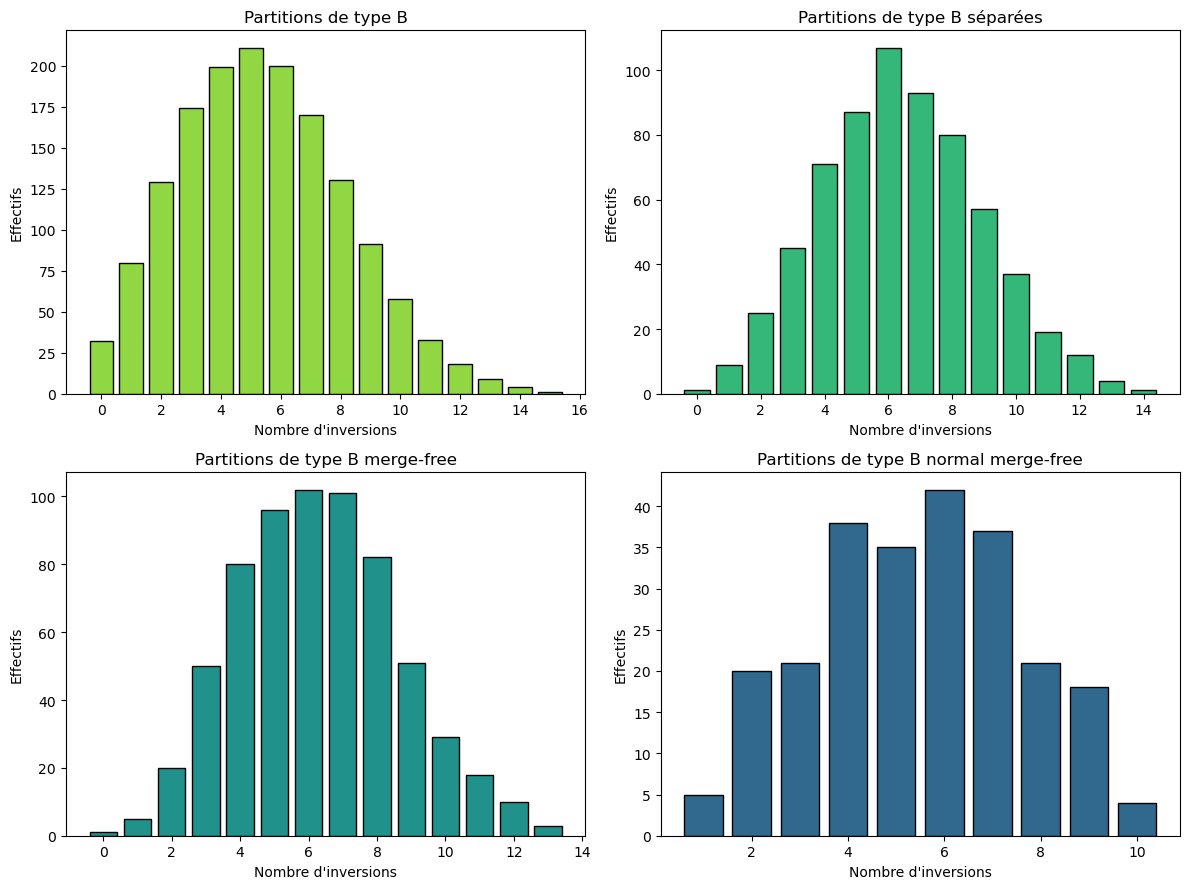

Partitions de type B :
Nombre d'inversions : 0, Effectifs : 32
Nombre d'inversions : 1, Effectifs : 80
Nombre d'inversions : 2, Effectifs : 129
Nombre d'inversions : 3, Effectifs : 174
Nombre d'inversions : 4, Effectifs : 199
Nombre d'inversions : 5, Effectifs : 211
Nombre d'inversions : 6, Effectifs : 200
Nombre d'inversions : 7, Effectifs : 170
Nombre d'inversions : 8, Effectifs : 130
Nombre d'inversions : 9, Effectifs : 91
Nombre d'inversions : 10, Effectifs : 58
Nombre d'inversions : 11, Effectifs : 33
Nombre d'inversions : 12, Effectifs : 18
Nombre d'inversions : 13, Effectifs : 9
Nombre d'inversions : 14, Effectifs : 4
Nombre d'inversions : 15, Effectifs : 1

Partitions de type B séparées :
Nombre d'inversions : 0, Effectifs : 1
Nombre d'inversions : 1, Effectifs : 9
Nombre d'inversions : 2, Effectifs : 25
Nombre d'inversions : 3, Effectifs : 45
Nombre d'inversions : 4, Effectifs : 71
Nombre d'inversions : 5, Effectifs : 87
Nombre d'inversions : 6, Effectifs : 107
Nombre d'invers

In [20]:
def get_bar_data(inv_counts):
    valeurs, effectifs = np.unique(inv_counts, return_counts=True)
    return valeurs, effectifs


# Inversions
vals_B, cnts_B = get_bar_data(parts_B_inv_counts)
vals_B_sep, cnts_B_sep = get_bar_data(parts_B_separated_inv_counts)
vals_B_mf, cnts_B_mf = get_bar_data(parts_B_merge_free_inv_counts)
vals_B_nmf, cnts_B_nmf = get_bar_data(parts_B_normal_merge_free_inv_counts)

# Visualiser
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Diagramme à bâtons pour partitions de type B
axes[0, 0].bar(vals_B, cnts_B, color="#90d743", edgecolor="black")
axes[0, 0].set_xlabel("Nombre d'inversions")
axes[0, 0].set_ylabel("Effectifs")
axes[0, 0].set_title("Partitions de type B")

# Diagramme à bâtons pour partitions de type B séparées
axes[0, 1].bar(vals_B_sep, cnts_B_sep, color="#35b779", edgecolor="black")
axes[0, 1].set_xlabel("Nombre d'inversions")
axes[0, 1].set_ylabel("Effectifs")
axes[0, 1].set_title("Partitions de type B séparées")

# Diagramme à bâtons pour partitions de type B merge-free
axes[1, 0].bar(vals_B_mf, cnts_B_mf, color="#21918c", edgecolor="black")
axes[1, 0].set_xlabel("Nombre d'inversions")
axes[1, 0].set_ylabel("Effectifs")
axes[1, 0].set_title("Partitions de type B merge-free")

# Diagramme à bâtons pour partitions de type B normal merge-free
axes[1, 1].bar(vals_B_nmf, cnts_B_nmf, color="#31688e", edgecolor="black")
axes[1, 1].set_xlabel("Nombre d'inversions")
axes[1, 1].set_ylabel("Effectifs")
axes[1, 1].set_title("Partitions de type B normal merge-free")


plt.tight_layout()
plt.show()

# Afficher les effectifs des diagrammes
print("Partitions de type B :")
for val, cnt in zip(vals_B, cnts_B):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B séparées :")
for val, cnt in zip(vals_B_sep, cnts_B_sep):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B merge-free :")
for val, cnt in zip(vals_B_mf, cnts_B_mf):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")
print("\nPartitions de type B normal merge-free :")
for val, cnt in zip(vals_B_nmf, cnts_B_nmf):
    print(f"Nombre d'inversions : {val}, Effectifs : {cnt}")

### Type B inversion free set partitions

Une inversion est un couple $(s, S_j)$, avec $s$ un entier et $S_j$ un bloc, tels que :
- $s \in S_i$ avec $i<j$
- $s > m_j$ avec $m_j$ le minimum en valeur absolue du bloc $S$ 

In [21]:
# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Partitions de type B  inversion-free.
parts_B_inversion_free = [part for part in parts_B if is_inversion_free(part)]
# Partition de type B inversion-free séparée.
parts_B_inversion_free_separated = [part for part in parts_B_inversion_free if is_separated(part)]
# Partitions de type B inversion-free merge-free.
parts_B_inversion_free_merge_free = [part for part in parts_B_inversion_free if is_merge_free(part)]
# Partitions de type B inversion-free normal merge-free.
parts_B_inversion_free_normal_merge_free = [part for part in parts_B_inversion_free if is_normal_merge_free(part)]


# Afficher les résultats
print_partitions(parts_B_inversion_free, length=n, name="partitions de type B inversion-free", scope=3)
print(f"Nombre de partitions de type B inversion-free séparées pour n={n} : {len(parts_B_inversion_free_separated)}")
print(f"Nombre de partitions de type B inversion-free merge-free pour n={n} : {len(parts_B_inversion_free_merge_free)}")
print(f"Nombre de partitions de type B inversion-free normal merge-free pour n={n} : {len(parts_B_inversion_free_normal_merge_free)}")


[[-1, -2, -3, -4, -5], [1, 2, 3, 4, 5]]
[[-1, -2, -3, -4], [1, 2, 3, 4], [-5], [5]]
[[-1, -2, -3], [1, 2, 3], [-4, -5], [4, 5]]
...
[[-1], [1], [-2], [2], [-3, -4], [3, 4], [-5], [5]]
[[-1], [1], [-2], [2], [-3], [3], [-4, -5], [4, 5]]
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5], [5]]
Nombre de partitions de type B inversion-free pour n=5 : 16
Nombre de partitions de type B inversion-free séparées pour n=5 : 1
Nombre de partitions de type B inversion-free merge-free pour n=5 : 1
Nombre de partitions de type B inversion-free normal merge-free pour n=5 : 0


In [22]:
results = []
for n in range(0, 9):
    E = list(range(1, n+1))
    parts_A = partitionne_bell(E)
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)
    
    parts_B_inversion_free = [part for part in parts_B if is_inversion_free(part)]
    parts_B_inversion_free_separated = [part for part in parts_B_inversion_free if is_separated(part)]
    parts_B_inversion_free_strongly_separated = [part for part in parts_B_inversion_free if is_strongly_separated(part)]
    parts_B_inversion_free_merge_free = [part for part in parts_B_inversion_free if is_merge_free(part)]
    parts_B_inversion_free_normal_merge_free = [part for part in parts_B_inversion_free if is_normal_merge_free(part)]
    
    results.append({
        'n': n,
        'inversion_free': len(parts_B_inversion_free),
        'separated_IF': len(parts_B_inversion_free_separated),
        'strongly_separated_IF': len(parts_B_inversion_free_strongly_separated),
        'merge_free_IF': len(parts_B_inversion_free_merge_free),
        'normal_merge_free_IF': len(parts_B_inversion_free_normal_merge_free)
    })

df = pd.DataFrame(results).set_index('n')
df

,inversion_free,separated_IF,strongly_separated_IF,merge_free_IF,normal_merge_free_IF
n,,,,,
0,1,1,1,1,1
1,1,1,1,1,0
2,2,1,1,1,0
3,4,1,1,1,0
4,8,1,1,1,0
5,16,1,1,1,0
6,32,1,1,1,0
7,64,1,1,1,0
8,128,1,1,1,0


In [23]:
n = 4
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Récupérer les merged free inversion free
parts_B_mf_if = [part for part in parts_B if is_merge_free(part) and is_inversion_free(part)]

# Afficher les partitions mf-if
for i in range(len(parts_B_mf_if)):
    print("MIF", parts_B_mf_if[i], "typeA", parts_A[i])

MIF [[-1, -2, -3, -4], [1, 2, 3, 4]] typeA [[1, 2, 3, 4]]


### Type B non-crossing partitions

In [24]:
def pp(x, y):
    """
    Détermine si x < y dans l'ordre modifié
    """
    if (x > 0 and y < 0) \
        or (x * y > 0 and abs(x) > abs(y)):
        return True
    else:
        return False


def sort_modified_order(lst):
    """
    Trie une liste d'entiers dans un ordre modifié
    """
    count_swaps = -1
    while count_swaps != 0:
        count_swaps = 0
        for i in range(len(lst) - 1):
            if pp(lst[i+1], lst[i]):
                lst[i], lst[i + 1] = lst[i + 1], lst[i]
                count_swaps += 1
    return lst


def is_non_crossing(part):
    """
    Vérifie si une partition est non croisée
    """
    # Trier chaque element de chaque bloc selon l'ordre modifié
    sorted_part = [sort_modified_order(block) for block in part]

    # Vérifier qu'il n'existe pas de a, b, c, d
    # avec a, b dans bloc1 et c, d dans bloc2
    # tels que a < c < b < d ou c < a < d < b
    for bloc1 in sorted_part:
        if len(bloc1) == 1:
            continue
        for i in range(len(bloc1) - 1):
            a = bloc1[i]
            b = bloc1[i + 1]
            for bloc2 in sorted_part:
                if len(bloc2) == 1:
                    continue
                if bloc2 != bloc1:
                    for j in range(len(bloc2) - 1):
                        c = bloc2[j]
                        d = bloc2[j + 1]
                        if (pp(a, c) and pp(c, b) and pp(b, d)) or \
                           (pp(c, a) and pp(a, d) and pp(d, b)):
                            return False
    return True


# Exemple
part = [[1, -2, 5, -6, -8], [-1, 2, -5, 6, 8], [3, -7], [-3, 7], [4], [-4]]
part = [[0, 4], [1, 2, 5, 6, 8], [3, 7]]
print("Partition:", part)
print("Non-crossing :", is_non_crossing(part))
print(is_merge_free(part))


Partition: [[0, 4], [1, 2, 5, 6, 8], [3, 7]]
Non-crossing : False
True


In [25]:
# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Filtrer les partitions de type B pour ne garder que celles qui sont non-crossing.
parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]
# Afficher les résultats
print_partitions(parts_B_non_crossing, length=n, name="partitions de type B non-crossing", scope=3)


[[-5, -4, -3, -2, -1], [5, 4, 3, 2, 1]]
[[5, -4, -3, -2, -1], [4, 3, 2, 1, -5]]
[[5, 4, -3, -2, -1], [3, 2, 1, -5, -4]]
...
[[-1], [1], [-2], [2], [-3], [3], [-5, -4], [5, 4]]
[[-1], [1], [-2], [2], [-3], [3], [5, -4], [4, -5]]
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5], [5]]
Nombre de partitions de type B non-crossing pour n=5 : 126


In [26]:
def is_non_nesting(part):
    """
    Vérifie si une partition est non croisée
    """

    # Trier chaque element de chaque bloc selon l'ordre naturel
    sorted_part = [sorted(block) for block in part]

    # Vérifier qu'il n'existe pas de a, b, c, d
    # avec a, b consécutifs dans bloc1 et c, d consécutifs dans bloc2
    # tels que a < c < d < b ou c < a < b < d
    for bloc1 in sorted_part:
        for i in range(len(bloc1) - 1):
            if len(bloc1) == 1:
                    continue
            a = bloc1[i]
            b = bloc1[i + 1]

            for bloc2 in sorted_part:
                if bloc2 != bloc1:
                    if len(bloc2) == 1:
                        continue
                    for j in range(len(bloc2) - 1):
                        c = bloc2[j]
                        d = bloc2[j + 1]
                        if (a < c < d < b) or (c < a < b < d):
                            return False
    return True


# Exemple
part = [[1, 2, 4], [3]]
print("Partition:", part)
print("Non-nesting :", is_non_nesting(part))

Partition: [[1, 2, 4], [3]]
Non-nesting : True


In [27]:
# Paramètres
n = 5
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Filtrer les partitions de type B pour ne garder que celles qui sont non-nesting.
parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
# Afficher les résultats
print_partitions(parts_B_non_nesting, length=n, name="partitions de type B non-neting", scope=3)

[[-1, -2, -3, -4, -5], [1, 2, 3, 4, 5]]
[[-1, 2, -3, -4, -5], [1, -2, 3, 4, 5]]
[[-1, 2, -3, 4, -5], [1, -2, 3, -4, 5]]
...
[[-1], [1], [-2], [2], [-3], [3], [-4, -5], [4, 5]]
[[-1], [1], [-2], [2], [-3], [3], [-4, 5], [4, -5]]
[[-1], [1], [-2], [2], [-3], [3], [-4], [4], [-5], [5]]
Nombre de partitions de type B non-neting pour n=5 : 126


In [28]:
results = []
for n in range(0, 8):
    E = list(range(1, n+1))
    U = list(range(0, n+1))
    parts_A = partitionne_bell(E)
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)
    parts_A_with_b0 = partitionne_bell(U)
    parts_B_with_b0 = get_all_parts_B_from_A(parts_A_with_b0, complete=True)
    
    parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]
    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_crossing_with_b0 = [part for part in parts_B_with_b0 if is_non_crossing(part)]
    parts_B_non_nesting_with_b0 = [part for part in parts_B_with_b0 if is_non_nesting(part)]

    
    for part in parts_B_non_nesting:
        print("parts_B_non_nesting:", part, "n = ", n)
    
    for part in parts_B_non_nesting_with_b0:
        print("parts_B_non_nesting_with_b0:", part, "n = ", n)
    
    print("- - - -")

    results.append({
        'n': n,
        'non_crossing': len(parts_B_non_crossing),
        'non_crossing_merge_free': len([part for part in parts_B_non_crossing if is_merge_free(part)]),
        'non_crossing_with_b0': len(parts_B_non_crossing_with_b0),
        'non_nesting': len(parts_B_non_nesting),
        'non_nesting_merge_free': len([part for part in parts_B_non_nesting if is_merge_free(part)]),
        'non_nesting_with_b0': len(parts_B_non_nesting_with_b0)
    })
df = pd.DataFrame(results).set_index('n')
df

parts_B_non_nesting: [] n =  0
parts_B_non_nesting_with_b0: [[0]] n =  0
- - - -
parts_B_non_nesting: [[-1], [1]] n =  1
parts_B_non_nesting_with_b0: [[0, 1, -1]] n =  1
parts_B_non_nesting_with_b0: [[0], [-1], [1]] n =  1
- - - -
parts_B_non_nesting: [[-2, -1], [2, 1]] n =  2
parts_B_non_nesting: [[2, -1], [1, -2]] n =  2
parts_B_non_nesting: [[-1], [1], [-2], [2]] n =  2
parts_B_non_nesting_with_b0: [[0, 2, 1, -2, -1]] n =  2
parts_B_non_nesting_with_b0: [[0, 1, -1], [-2], [2]] n =  2
parts_B_non_nesting_with_b0: [[0, 2, -2], [-1], [1]] n =  2
parts_B_non_nesting_with_b0: [[0], [-2, -1], [2, 1]] n =  2
parts_B_non_nesting_with_b0: [[0], [2, -1], [1, -2]] n =  2
parts_B_non_nesting_with_b0: [[0], [-1], [1], [-2], [2]] n =  2
- - - -
parts_B_non_nesting: [[-3, -2, -1], [3, 2, 1]] n =  3
parts_B_non_nesting: [[2, -3, -1], [3, 1, -2]] n =  3
parts_B_non_nesting: [[3, 2, -1], [1, -3, -2]] n =  3
parts_B_non_nesting: [[-2, -1], [2, 1], [-3], [3]] n =  3
parts_B_non_nesting: [[2, -1], [1, -

,non_crossing,non_crossing_merge_free,non_crossing_with_b0,non_nesting,non_nesting_merge_free,non_nesting_with_b0
n,,,,,,
0,1,1,1,1,1,1
1,1,1,2,1,1,2
2,3,2,6,3,2,6
3,10,5,20,10,5,20
4,35,13,70,35,14,70
5,126,32,252,126,38,252
6,462,76,924,462,106,924
7,1716,176,3432,1716,291,3432


In [29]:
def calcule_mn(n):
    return (2**(n-4)) * (3*n + 1)

for n in range(3, 10):
    print(calcule_mn(n))

5.0
13
32
76
176
400
896


### Type B non-nesting partitions

$P$ is nonnesting if its bump diagram contains no two nested edges, equivalently if $G(P)$ contains no two edges of form $(a, d)$, $(b, c)$ with $a < b < c < d$.

*Definition 1.10, https://inria.hal.science/hal-01185429/document*

[[-1, -2], [1, 2]]
[[-1, 2], [1, -2]]
[[-1], [1], [-2], [2]]
Nombre de partitions de type B nesting-free pour n=2 : 3
True


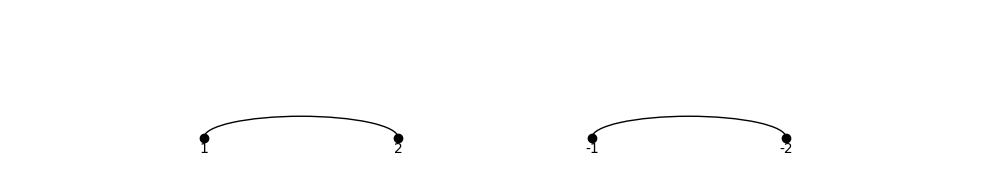

True


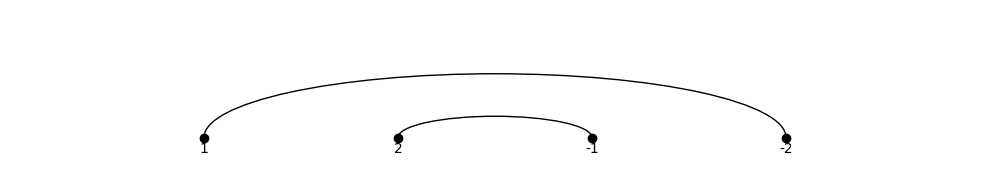

True


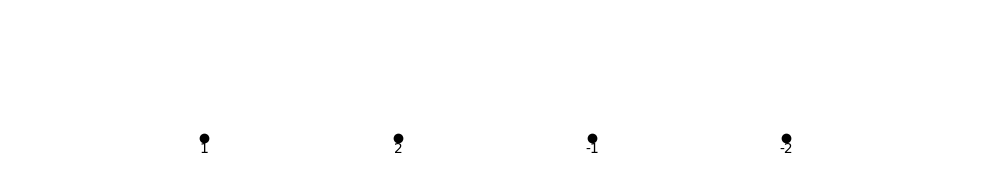

In [30]:
# Exemple
n = 2
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
# Générer toutes les partitions de type B à partir des partitions de type A.
parts_B = get_all_parts_B_from_A(parts_A, complete=True)
# Récupérer les nesting-free
parts_B_nf = [part for part in parts_B if is_non_nesting(part)]

for part in parts_B:
    for i in range(len(part)):
            for j in range(len(part[i])):
                if part[i][j] > n:
                    part[i][j] = -(part[i][j] - n)

for part in parts_B_nf:
    for i in range(len(part)):
            for j in range(len(part[i])):
                if part[i][j] > n:
                    part[i][j] = -(part[i][j] - n)


# Afficher les résultats
print_partitions(parts_B_nf, n, "partitions de type B nesting-free", 4)

for part in parts_B:
    if part in parts_B_nf:
        print("True")
    else:
        print("False")
    plot_partition(part)


True


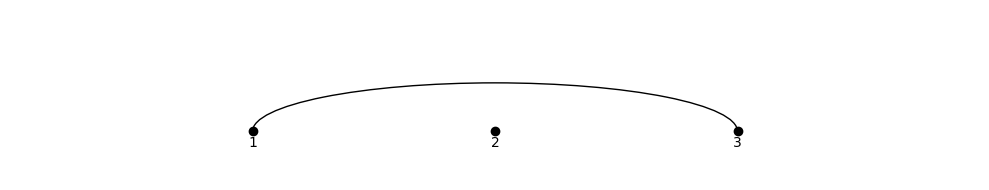

In [31]:
part = [[1, 3], [2]]
print(is_non_nesting(part))
plot_partition(part)

In [32]:
results = []
for n in range(9):
    # Générer toutes les partitions de type A.
    E = list(range(1, n+1))
    parts_A = partitionne_bell(E)
    # Générer toutes les partitions de type B à partir des partitions de type A.
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)

    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_nesting_separated = [part for part in parts_B_non_nesting if is_separated(part)]
    parts_B_non_nesting_merge_free = [part for part in parts_B_non_nesting if is_merge_free(part)]
    parts_B_non_nesting_normal_merge_free = [part for part in parts_B_non_nesting if is_normal_merge_free(part)]

    # Afficher les résultats
    results.append({
        'n': n,
        'non_nesting': len(parts_B_non_nesting),
        'separated_NN': len(parts_B_non_nesting_separated),
        'merge_free_NN': len(parts_B_non_nesting_merge_free),
        'normal_merge_free_NN': len(parts_B_non_nesting_normal_merge_free)
    })
df = pd.DataFrame(results).set_index('n')
df


,non_nesting,separated_NN,merge_free_NN,normal_merge_free_NN
n,,,,
0,1,1,1,1
1,1,1,1,0
2,3,2,2,1
3,10,6,5,2
4,35,20,14,4
5,126,70,38,8
6,462,252,106,16
7,1716,924,291,32
8,6435,3432,808,64


###  S MF NN NC

In [33]:
results = []
for n in range(8):
    # Générer toutes les partitions de type A.
    E = list(range(1, n+1))
    parts_A = partitionne_bell(E)
    # Générer toutes les partitions de type B à partir des partitions de type A.
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)
    
    parts_B_separated = [part for part in parts_B if is_separated(part)]
    parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
    parts_B_separated_merge_free = [part for part in parts_B_separated if is_merge_free(part)]

    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]
    parts_B_non_nesting_non_crossing = [part for part in parts_B_non_nesting if is_non_crossing(part)]

    # Afficher les résultats
    results.append({
        'n': n,
        'separated': len(parts_B_separated),
        'merge_free': len(parts_B_merge_free),
        'separated_merge_free': len(parts_B_separated_merge_free),
        'non_nesting': len(parts_B_non_nesting),
        'non_crossing': len(parts_B_non_crossing),
        'non_nesting_non_crossing': len(parts_B_non_nesting_non_crossing)
    })
df = pd.DataFrame(results).set_index('n')
print("Sans bloc 0")
df


Sans bloc 0


,separated,merge_free,separated_merge_free,non_nesting,non_crossing,non_nesting_non_crossing
n,,,,,,
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,2,2,1,3,3,3
3,6,6,3,10,10,9
4,24,24,11,35,35,26
5,116,116,49,126,126,73
6,648,648,257,462,462,201
7,4088,4088,1539,1716,1716,546


In [34]:
results = []
for n in range(8):
    # Générer toutes les partitions de type A.
    E = list(range(0, n+1))
    parts_A = partitionne_bell(E)
    # Générer toutes les partitions de type B à partir des partitions de type A.
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)
    
    parts_B_separated = [part for part in parts_B if is_separated(part)]
    parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
    parts_B_separated_merge_free = [part for part in parts_B_separated if is_merge_free(part)]

    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]
    parts_B_non_nesting_non_crossing = [part for part in parts_B_non_nesting if is_non_crossing(part)]

    # Afficher les résultats
    results.append({
        'n': n,
        'separated': len(parts_B_separated),
        'merge_free': len(parts_B_merge_free),
        'separated_merge_free': len(parts_B_separated_merge_free),
        'non_nesting': len(parts_B_non_nesting),
        'non_crossing': len(parts_B_non_crossing),
        'non_nesting_non_crossing': len(parts_B_non_nesting_non_crossing)
    })

    for part in parts_B_non_crossing:
        print(part)

df = pd.DataFrame(results).set_index('n')
print("Avec bloc 0")
df

[[0]]
[[0, 1, -1]]
[[0], [-1], [1]]
[[0, 2, 1, -2, -1]]
[[0, 1, -1], [-2], [2]]
[[0, 2, -2], [-1], [1]]
[[0], [-2, -1], [2, 1]]
[[0], [2, -1], [1, -2]]
[[0], [-1], [1], [-2], [2]]
[[0, 3, 2, 1, -3, -2, -1]]
[[0, 2, 1, -2, -1], [-3], [3]]
[[0, 3, 1, -3, -1], [-2], [2]]
[[0, 1, -1], [-3, -2], [3, 2]]
[[0, 3, 2, -3, -2], [-1], [1]]
[[0, 2, -2], [3, -1], [1, -3]]
[[0, 3, -3], [-2, -1], [2, 1]]
[[0], [-3, -2, -1], [3, 2, 1]]
[[0], [3, -2, -1], [2, 1, -3]]
[[0], [3, 2, -1], [1, -3, -2]]
[[0, 1, -1], [-2], [2], [-3], [3]]
[[0, 2, -2], [-1], [1], [-3], [3]]
[[0], [-2, -1], [2, 1], [-3], [3]]
[[0], [2, -1], [1, -2], [-3], [3]]
[[0, 3, -3], [-1], [1], [-2], [2]]
[[0], [-3, -1], [3, 1], [-2], [2]]
[[0], [3, -1], [1, -3], [-2], [2]]
[[0], [-1], [1], [-3, -2], [3, 2]]
[[0], [-1], [1], [3, -2], [2, -3]]
[[0], [-1], [1], [-2], [2], [-3], [3]]
[[0, 4, 3, 2, 1, -4, -3, -2, -1]]
[[0, 3, 2, 1, -3, -2, -1], [-4], [4]]
[[0, 4, 2, 1, -4, -2, -1], [-3], [3]]
[[0, 2, 1, -2, -1], [-4, -3], [4, 3]]
[[0, 4, 3, 1

,separated,merge_free,separated_merge_free,non_nesting,non_crossing,non_nesting_non_crossing
n,,,,,,
0,1,1,1,1,1,1
1,2,1,1,2,2,2
2,4,2,1,6,6,6
3,14,7,4,20,20,17
4,60,32,16,70,70,47
5,306,173,80,252,252,128
6,1796,1064,458,924,924,345
7,11838,7275,2940,3432,3432,923


In [35]:
results = []
for n in range(8):
    # Générer toutes les partitions de type A.
    E = list(range(1, n+1))
    parts_A = partitionne_bell(E)
    # Générer toutes les partitions de type B à partir des partitions de type A.
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)

    parts_B_separated = [part for part in parts_B if is_separated(part)]
    parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]

    parts_B_separated_non_nesting = [part for part in parts_B_separated if is_non_nesting(part)]
    parts_B_separated_non_crossing = [part for part in parts_B_separated if is_non_crossing(part)]
    parts_B_merge_free_non_nesting = [part for part in parts_B_merge_free if is_non_nesting(part)]
    parts_B_merge_free_non_crossing = [part for part in parts_B_merge_free if is_non_crossing(part)]

    # Afficher les résultats
    results.append({
        'n': n,
        'separated': len(parts_B_separated),
        'merge_free': len(parts_B_merge_free),
        'non_nesting': len(parts_B_non_nesting),
        'non_crossing': len(parts_B_non_crossing),
        'separated_non_nesting': len(parts_B_separated_non_nesting),
        'separated_non_crossing': len(parts_B_separated_non_crossing),
        'merge_free_non_nesting': len(parts_B_merge_free_non_nesting),
        'merge_free_non_crossing': len(parts_B_merge_free_non_crossing)
    })
df = pd.DataFrame(results).set_index('n')
print("Sans bloc 0")
df

Sans bloc 0


,separated,merge_free,non_nesting,non_crossing,separated_non_nesting,separated_non_crossing,merge_free_non_nesting,merge_free_non_crossing
n,,,,,,,,
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,2,2,3,3,2,2,2,2
3,6,6,10,10,6,5,5,5
4,24,24,35,35,20,13,14,13
5,116,116,126,126,70,35,38,32
6,648,648,462,462,252,96,106,76
7,4088,4088,1716,1716,924,267,291,176


In [36]:
results = []
for n in range(8):
    # Générer toutes les partitions de type A.
    E = list(range(0, n+1))
    parts_A = partitionne_bell(E)
    # Générer toutes les partitions de type B à partir des partitions de type A.
    parts_B = get_all_parts_B_from_A(parts_A, complete=True)

    parts_B_separated = [part for part in parts_B if is_separated(part)]
    parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
    parts_B_non_nesting = [part for part in parts_B if is_non_nesting(part)]
    parts_B_non_crossing = [part for part in parts_B if is_non_crossing(part)]

    parts_B_separated_non_nesting = [part for part in parts_B_separated if is_non_nesting(part)]
    parts_B_separated_non_crossing = [part for part in parts_B_separated if is_non_crossing(part)]
    parts_B_merge_free_non_nesting = [part for part in parts_B_merge_free if is_non_nesting(part)]
    parts_B_merge_free_non_crossing = [part for part in parts_B_merge_free if is_non_crossing(part)]

    # Afficher les résultats
    results.append({
        'n': n,
        'separated': len(parts_B_separated),
        'merge_free': len(parts_B_merge_free),
        'non_nesting': len(parts_B_non_nesting),
        'non_crossing': len(parts_B_non_crossing),
        'separated_non_nesting': len(parts_B_separated_non_nesting),
        'separated_non_crossing': len(parts_B_separated_non_crossing),
        'merge_free_non_nesting': len(parts_B_merge_free_non_nesting),
        'merge_free_non_crossing': len(parts_B_merge_free_non_crossing)
    })
df = pd.DataFrame(results).set_index('n')
print("Avec bloc 0")
df

Avec bloc 0


,separated,merge_free,non_nesting,non_crossing,separated_non_nesting,separated_non_crossing,merge_free_non_nesting,merge_free_non_crossing
n,,,,,,,,
0,1,1,1,1,1,1,1,1
1,2,1,2,2,2,2,1,1
2,4,2,6,6,4,4,2,2
3,14,7,20,20,12,10,5,5
4,60,32,70,70,40,26,13,13
5,306,173,252,252,140,70,36,34
6,1796,1064,924,924,504,192,98,86
7,11838,7275,3432,3432,1848,534,273,210


### Stirling Permutations

Nombre de permutations de Stirling pour n=6 : 10395
[5, 5, 4, 6, 6, 4, 3, 3, 2, 2, 1, 1]
[(0, 5), (0, 4), (4, 6), (0, 3), (0, 2), (0, 1)]


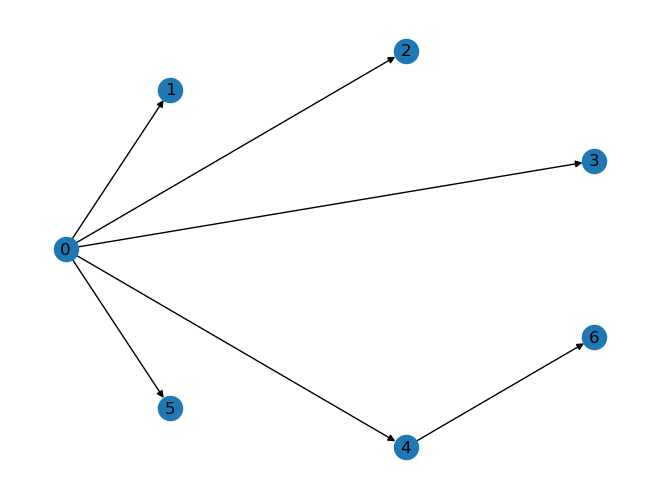

In [37]:
# Exemple
n = 6
A = list(range(1, n + 1))
permutations = generate_stirling_permutations_rec(n)
print(f"Nombre de permutations de Stirling pour n={n} : {len(permutations)}")
print(permutations[3])

# Afficher un arbre
graph = get_tree_from_stir_perm(permutations[3])
print(graph)

G = nx.DiGraph()
G.add_edges_from(graph)
nx.draw_shell(G, with_labels=True)


### Flattened Stirling Permutations

In [38]:
# Exemple
perm = [1, 4, 5, 2, 3, 6, 1, 9]
is_run_sorted(perm)

False

Bijection entre Type B merging-free partitions et Flattened stirling permutations.

Partition Merging-Free : [[1, 2, 3, 5, 6], [4]]
Permutation de Stirling : [1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 4]


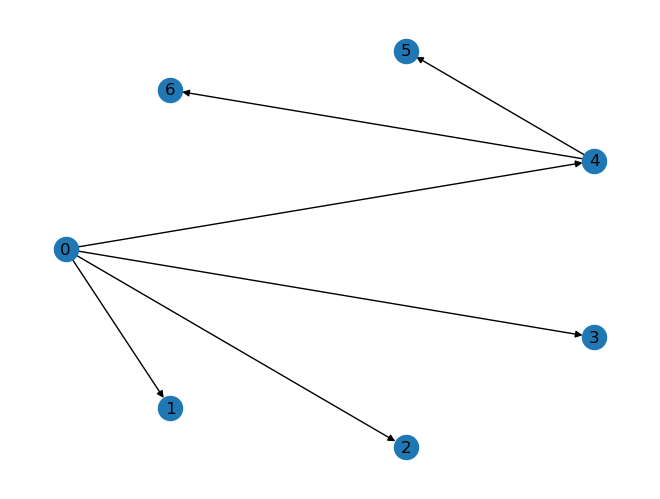

In [39]:
# Exemple
part = [[1, -6, 7], [2, 3, -4, 8, -9, -10], [5, -11, 12]]
part = [[1, 2, 3, 5, 6], [4]]
perm = get_flattened_stirling_permutations(part)
print(f"Partition Merging-Free : {part}")
print(f"Permutation de Stirling : {perm}")

# Afficher un arbre
graph = get_tree_from_stir_perm(perm)
G = nx.DiGraph()
G.add_edges_from(graph)
nx.draw_shell(G, with_labels=True)


In [40]:
# Exemple
n = 6
A = list(range(1, n + 1))
parts_A = partitionne_bell(A)
parts_B = get_all_parts_B_from_A(parts_A)
parts_B_merge_free = [part for part in parts_B if is_merge_free(part)]
permutations = [get_flattened_stirling_permutations(part) for part in parts_B_merge_free]

unique_permutations = []
for i in range(len(permutations)):
    print("Partition", parts_B_merge_free[i], "\nPermutation de Stirling", permutations[i] )
    # Créer un arbre non dirigé
    G = nx.Graph()
    G.add_edges_from(get_tree_from_stir_perm(permutations[i]))
    # Compter les feuilles (nœuds de degré 1, sauf la racine si elle n'a qu'un enfant)
    leaves = [node for node in G.nodes() if G.degree(node) == 1]
    # Afficher le nombre de feuilles
    print("Nombre de feuilles :", len(leaves))
    print (count_leaves_on_stir_perm(permutations[i]))

    if permutations[i] not in unique_permutations:
        unique_permutations.append(permutations[i])

print("Nombre de partitions de type B merge-free :", len(parts_B_merge_free))
print(f"Nombre de permutations de Stirling uniques : {len(unique_permutations)}")




Partition [[1, 2, 3, 4, 5, 6]] 
Permutation de Stirling [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Nombre de feuilles : 6
6
Partition [[1, 2, 3, 4, 5, -6]] 
Permutation de Stirling [1, 6, 6, 1, 2, 2, 3, 3, 4, 4, 5, 5]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, 4, -5, 6]] 
Permutation de Stirling [1, 5, 5, 1, 2, 2, 3, 3, 4, 4, 6, 6]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, 4, -5, -6]] 
Permutation de Stirling [1, 5, 5, 6, 6, 1, 2, 2, 3, 3, 4, 4]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, -4, 5, 6]] 
Permutation de Stirling [1, 4, 4, 1, 2, 2, 3, 3, 5, 5, 6, 6]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, -4, 5, -6]] 
Permutation de Stirling [1, 4, 4, 6, 6, 1, 2, 2, 3, 3, 5, 5]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, -4, -5, 6]] 
Permutation de Stirling [1, 4, 4, 5, 5, 1, 2, 2, 3, 3, 6, 6]
Nombre de feuilles : 5
5
Partition [[1, 2, 3, -4, -5, -6]] 
Permutation de Stirling [1, 4, 4, 5, 5, 6, 6, 1, 2, 2, 3, 3]
Nombre de feuilles : 5
5
Partition [[1, 2, -3, 4, 5, 6]] 
Permutation

Trees Flattened stirling permutations

In [41]:
# Exemple
n = 6
permutations = generate_stirling_permutations_rec(n)

count = 0
for i in range(len(permutations)):
    print(i)
    print("Permutation de Stirling", permutations[i] )
    print("Flattened :", is_run_sorted(permutations[i]))
    if is_run_sorted(permutations[i]):
        count += 1
print(f"Nombre de flattened stirling permutations pour n = {n} : {count}")


0
Permutation de Stirling [6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]
Flattened : False
1
Permutation de Stirling [5, 6, 6, 5, 4, 4, 3, 3, 2, 2, 1, 1]
Flattened : False
2
Permutation de Stirling [5, 5, 6, 6, 4, 4, 3, 3, 2, 2, 1, 1]
Flattened : False
3
Permutation de Stirling [5, 5, 4, 6, 6, 4, 3, 3, 2, 2, 1, 1]
Flattened : False
4
Permutation de Stirling [5, 5, 4, 4, 6, 6, 3, 3, 2, 2, 1, 1]
Flattened : False
5
Permutation de Stirling [5, 5, 4, 4, 3, 6, 6, 3, 2, 2, 1, 1]
Flattened : False
6
Permutation de Stirling [5, 5, 4, 4, 3, 3, 6, 6, 2, 2, 1, 1]
Flattened : False
7
Permutation de Stirling [5, 5, 4, 4, 3, 3, 2, 6, 6, 2, 1, 1]
Flattened : False
8
Permutation de Stirling [5, 5, 4, 4, 3, 3, 2, 2, 6, 6, 1, 1]
Flattened : False
9
Permutation de Stirling [5, 5, 4, 4, 3, 3, 2, 2, 1, 6, 6, 1]
Flattened : False
10
Permutation de Stirling [5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 6, 6]
Flattened : False
11
Permutation de Stirling [6, 6, 4, 5, 5, 4, 3, 3, 2, 2, 1, 1]
Flattened : False
12
Permutation de Stirling

[(0, 2), (2, 7), (2, 9), (0, 10), (0, 3), (3, 4), (3, 6), (0, 12), (0, 11)]


True

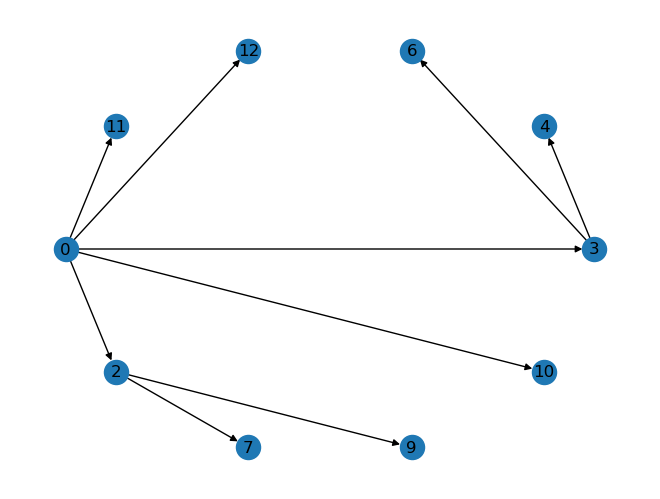

In [42]:
# Afficher un arbre
perm = [2, 7, 7, 9, 9, 2, 10, 10, 3, 4, 4, 6, 6, 3, 12, 12, 11, 11]
graph = get_tree_from_stir_perm(perm)
G = nx.DiGraph()
G.add_edges_from(graph)
nx.draw_shell(G, with_labels=True)
print(graph)
is_run_sorted(perm)

Arbre de la permutation de Stirling : [(0, 1), (1, 2), (1, 3), (0, 5), (5, 6), (0, 7), (0, 4)]
Perm run-sorted : False
Flattened : False


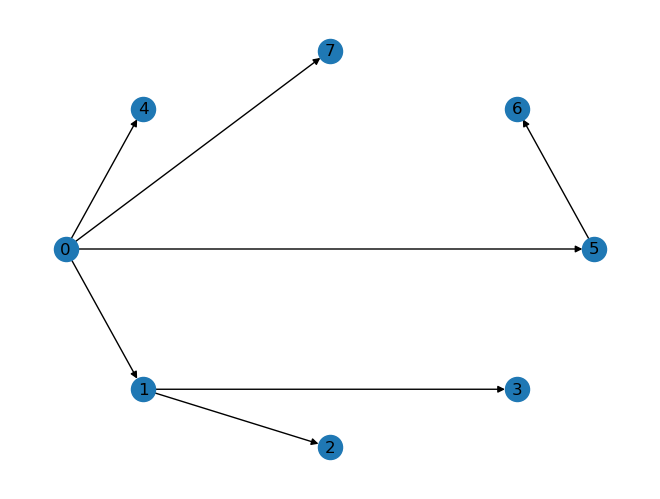

In [ ]:
def is_flattened_stirling_tree(tree):
    """
    Vérifie si un arbre respectes la définition de flattened.
    """
    tree_array = np.array(tree)
    parents = tree_array[:, 0]
    children = tree_array[:, 1]
    low_leaves = children[np.where(parents == 0)]
    high_leaves = children[np.where(parents != 0)]
    internal_nodes = pd.unique(parents[parents != 0])

    # Une feuille est toujours supérieur à son noeud parent
    if np.any(children <= parents):
        return False

    # La hauteur maximale est de 2
    # i.e. un enfant de parent non nul ne peux pas être parent
    if np.any(np.isin(high_leaves, parents)):
        return False
    
    # Les noeuds de hauteur 1 doivent être run sorted.
    vertices_height_1 = []
    for i in range(len(parents)):
        if parents[i] == 0:
            vertices_height_1.append(children[i])
        else:
            vertices_height_1.append(parents[i])
    if not is_run_sorted(vertices_height_1):
        return False
    
    # Si i et j deux feuilles avec le même noeud parent non nul
    # et j à droite de i, alors il faut que i < j.
    for node in internal_nodes:
        children_node = children[np.where(parents == node)]
        if len(children_node) > 1:
            for i in range(len(children_node) - 1):
                if children_node[i] > children_node[i + 1]:
                    return False

    # Si une feuille est basse,
    # alors elle doit être supérieure au noeud le plus proche à sa gauche.
    for i in range(1, len(parents)):
        if children[i] in low_leaves:
            # Trouver le noeud parent le plus proche à gauche
            if not len(parents[:i][np.where(parents[:i] != 0)]) == 0:
                parent_left = max(parents[:i][np.where(parents[:i] != 0)])
            else:
                parent_left = 0
            if children[i] < parent_left:
                return False

    return True

# Exemple
perm = [2, 7, 7, 9, 9, 2, 14, 14, 13, 13, 3, 4, 4, 6, 6, 3, 12, 12, 11, 11]
perm = [1, 1, 2, 2, 9, 9, 3, 8, 8, 3, 10, 12, 12, 10, 10, 11, 11, 4, 6, 6, 7, 7, 4, 5, 5, ]

tree = get_tree_from_stir_perm(perm)
print("Arbre de la permutation de Stirling :", tree)
print("Perm run-sorted :", is_run_sorted(perm))
print("Flattened :", is_flattened_stirling_tree(tree))
G = nx.DiGraph()
G.add_edges_from(tree)
nx.draw_shell(G, with_labels=True)

In [63]:
n = 7
permutations = generate_stirling_permutations_rec(n)

count_run_sorted_perm = 0
count_run_sorted_tree = 0
count = 0
for perm in permutations:
    tree = get_tree_from_stir_perm(perm)
    if is_run_sorted(perm):
        count_run_sorted_perm += 1
    if is_flattened_stirling_tree(tree):
        count_run_sorted_tree += 1
    
    if is_run_sorted(perm) and is_flattened_stirling_tree(tree):
        count += 1

print(f"Nombre de permutations de Stirling flattenned : {count_run_sorted_perm}")
print(f"Nombre d'arbres flattenned : {count_run_sorted_tree}")
print(f"Nombre de permutations de Stirling flattenned et d'arbres flattenned : {count}")


Nombre de permutations de Stirling flattenned : 4088
Nombre d'arbres flattenned : 4088
Nombre de permutations de Stirling flattenned et d'arbres flattenned : 4088


### Bijection Type B separated partitions and Flattened Stirling permutations

In [45]:
n = 4
# Générer toutes les partitions de type A.
E = list(range(1, n+1))
parts_A = partitionne_bell(E)
parts_B = get_all_parts_B_from_A(parts_A)
parts_B_separated = [part for part in parts_B if is_separated(part)]
print(f"Nombre de partitions de type B séparées pour n={n} : {len(parts_B_separated)}")

stir_perms = generate_stirling_permutations_rec(n)
flatt_stir_perms = [perm for perm in stir_perms if is_run_sorted(perm)]
print(f"Nombre de permutations de Stirling flattenned pour n={n} : {len(flatt_stir_perms)}")

print("Partitions de type B séparées :")
for part in parts_B_separated:
    print(part)

print("Permutations de Stirling flattenned :")
for perm in flatt_stir_perms:
    print(perm)

Nombre de partitions de type B séparées pour n=4 : 24
Nombre de permutations de Stirling flattenned pour n=4 : 24
Partitions de type B séparées :
[[1, -2, 3, -4]]
[[1, -2, 3], [4]]
[[1, -2, 4], [3]]
[[1, -2, -4], [3]]
[[1, -2], [3, -4]]
[[1, 3, -4], [2]]
[[1, -3, 4], [2]]
[[1, 3], [2, 4]]
[[1, 3], [2, -4]]
[[1, -3], [2, 4]]
[[1, -3], [2, -4]]
[[1, 4], [2, -3]]
[[1, -4], [2, -3]]
[[1], [2, -3, 4]]
[[1, -2], [3], [4]]
[[1, 3], [2], [4]]
[[1, -3], [2], [4]]
[[1], [2, -3], [4]]
[[1, 4], [2], [3]]
[[1, -4], [2], [3]]
[[1], [2, 4], [3]]
[[1], [2, -4], [3]]
[[1], [2], [3, -4]]
[[1], [2], [3], [4]]
Permutations de Stirling flattenned :
[1, 2, 2, 3, 3, 4, 4, 1]
[1, 2, 2, 3, 3, 1, 4, 4]
[1, 2, 2, 4, 4, 1, 3, 3]
[1, 2, 2, 1, 4, 4, 3, 3]
[1, 2, 2, 1, 3, 4, 4, 3]
[1, 2, 2, 1, 3, 3, 4, 4]
[1, 3, 3, 4, 4, 1, 2, 2]
[1, 3, 3, 1, 4, 4, 2, 2]
[1, 3, 3, 1, 2, 4, 4, 2]
[1, 3, 3, 1, 2, 2, 4, 4]
[1, 4, 4, 1, 3, 3, 2, 2]
[1, 1, 3, 3, 4, 4, 2, 2]
[1, 1, 3, 3, 2, 4, 4, 2]
[1, 1, 3, 3, 2, 2, 4, 4]
[1, 4, 4, 1, 2

In [46]:
def get_flat_stir_perm_from_sep_part(part):
    """
    Récupère la permutation de Stirling flattenned à partir d'une partition de type B séparée.
    """
    perm = []

    return True